<a href="https://colab.research.google.com/github/santiagordz/tc3002b/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cards-image-datasetclassification


In [5]:
%cd "/kaggle/input/cards-image-datasetclassification"
!ls

/kaggle/input/cards-image-datasetclassification
'14card types-14-(200 X 200)-94.61.h5'	 cards.csv   train
'53cards-53-(200 X 200)-100.00.h5'	 test	     valid


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = "/kaggle/input/cards-image-datasetclassification"
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Found 7624 images belonging to 53 classes.
(32, 224, 224, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

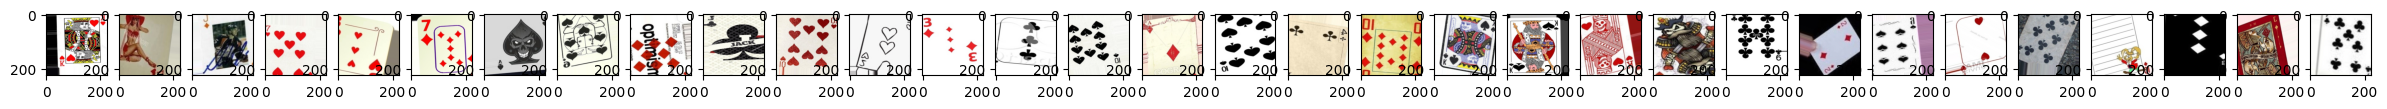

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [8]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(53, activation='softmax'))  # 53 clases

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(
    train_generator,
    epochs = 30
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 133s 518ms/step - accuracy: 0.0324 - loss: 3.9046
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 96s 402ms/step - accuracy: 0.1142 - loss: 3.2926
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 95s 398ms/step - accuracy: 0.1575 - loss: 3.0042
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 96s 401ms/step - accuracy: 0.1869 - loss: 2.8693
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 96s 403ms/step - accuracy: 0.2066 - loss: 2.7651
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 97s 407ms/step - accuracy: 0.2139 - loss: 2.7341
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 99s 415ms/step - accuracy: 0.2447 - loss: 2.6405
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 96s 402ms/step - accuracy: 0.2644 - loss: 2.5491
Epoch 9/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 95s 398ms/step - accuracy: 0.2982 - loss: 2.4636
Epoch 10/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 96s 399ms/step - accuracy: 0.3068 - loss: 2.3968
Epoch 11/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 144s 409ms/step - accuracy: 0.3219 - loss: 2.3440
Epoch 12/30
239/2

KeyError: 'acc'

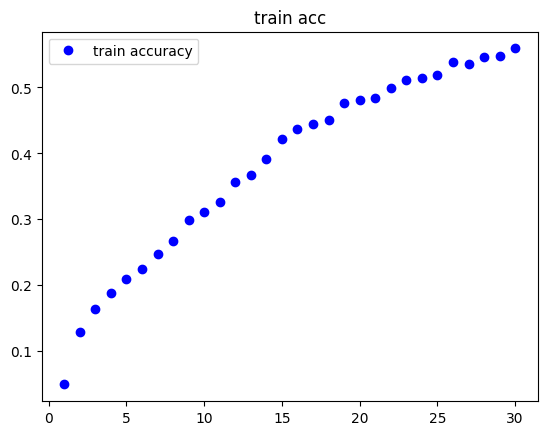

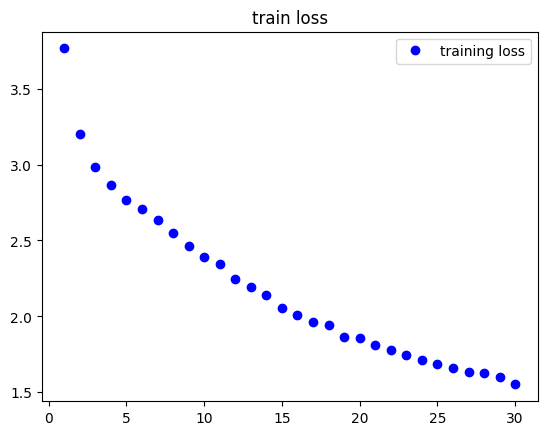

In [13]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()